In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from m5.functions import *
%aimport m5.functions

In [3]:
import lightgbm as lgb
import pandas as pd
import numpy as np

In [ ]:
# memory saving code
gbm = lgb.train(train_set= lgb.Dataset('../train.bin'), early_stopping_rounds=10, 
                num_boost_round=1000,                               
              params={'objective': 'regression',
                      'metric': 'rmse',
                     'num_threads': 3,
                      'force_row_wise': True,
                      'seed': 143,
#                       'extra_trees': True,
                      'lambda_l1': .5,
                      'tree_learner': 'feature',
                      'learning_rate' : 0.1 },
              valid_sets=lgb.Dataset('../test.bin'))

[1]	valid_0's rmse: 1.88075
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 1.78618
[3]	valid_0's rmse: 1.70505
[4]	valid_0's rmse: 1.6366
[5]	valid_0's rmse: 1.57928
[6]	valid_0's rmse: 1.53146
[7]	valid_0's rmse: 1.49238
[8]	valid_0's rmse: 1.45913
[9]	valid_0's rmse: 1.43238
[10]	valid_0's rmse: 1.4105
[11]	valid_0's rmse: 1.39277
[12]	valid_0's rmse: 1.3779
[13]	valid_0's rmse: 1.36619
[14]	valid_0's rmse: 1.35675


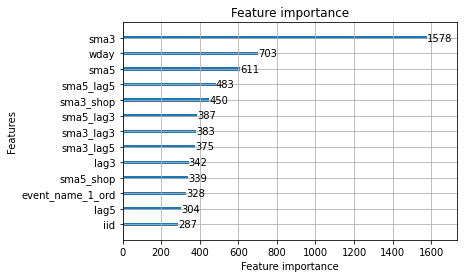

In [77]:
lgb.plot_importance(gbm)

In [67]:
Xy = pd.read_pickle('../Xy.pk')
X_test = pd.read_pickle('../X_test.pk')
y_test = pd.read_pickle('../y_test.pk')

In [84]:
y_hat = gbm.predict(X_test)
print(np.sqrt(((y_hat - y_test)**2).mean()))
y_hat_pd = pd.DataFrame(y_hat, columns=['sold'], index=X_test.index)
y_hat_pd['idi'] = X_test['iid']
y_hat_pd['d'] = Xy['date']
y_test_pd = pd.DataFrame(y_test.to_numpy(), columns=['sold'], index=X_test.index)
y_test_pd['idi'] = X_test['iid']
y_test_pd['d'] = Xy['date']

1.2734060110707497


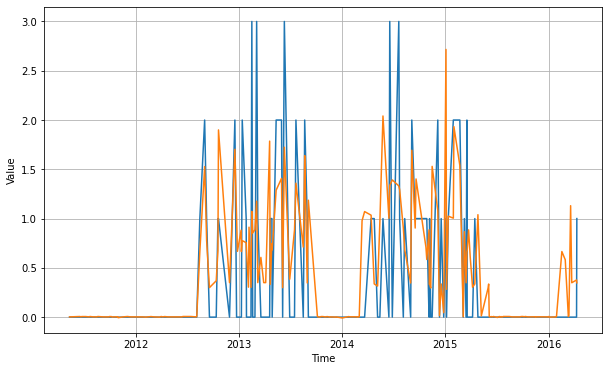

In [85]:
idi = 2990
yh70 = y_hat_pd[y_hat_pd.idi == idi].sort_values(by=['d'])
y70 = y_test_pd[y_test_pd.idi == idi].sort_values(by=['d'])
plt.figure(figsize=(10, 6))
plot_series(y70['d'], y70['sold'])
plot_series(yh70['d'], yh70['sold'])